In [165]:
data = {
  "text" : ['I love machine learning', 'I love deep learning', 'I love Data Science']
}

In [166]:
import pandas as pd
df = pd.DataFrame(data)

In [167]:
df

,text
0,I love machine learning
1,I love deep learning
2,I love Data Science


### One Hot Encoding

In [168]:
corpus = ""
for doc in df['text']:
  corpus += doc
  corpus += " "

In [169]:
corpus

'I love machine learning I love deep learning I love Data Science '

In [170]:
words = corpus.split(" ")

In [171]:
words

['I',
 'love',
 'machine',
 'learning',
 'I',
 'love',
 'deep',
 'learning',
 'I',
 'love',
 'Data',
 'Science',
 '']

In [172]:
vocab = set(words)

In [173]:
vocab

{'', 'Data', 'I', 'Science', 'deep', 'learning', 'love', 'machine'}

### Bag Of Words (BoW)

In [174]:
# sentences = []
# for doc in df['text']:
#   sentences.append(doc)

In [175]:
sentences = ["The cat in the hat", 
"The dog in the house", "The bird in the sky"]

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

In [177]:
vectorizer  = CountVectorizer()

In [178]:
bow = vectorizer.fit_transform(sentences)

In [179]:
bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (3, 8)>

In [180]:
vectorizer .get_feature_names_out()

array(['bird', 'cat', 'dog', 'hat', 'house', 'in', 'sky', 'the'],
      dtype=object)

In [181]:
bow.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 2],
       [0, 0, 1, 0, 1, 1, 0, 2],
       [1, 0, 0, 0, 0, 1, 1, 2]])

In [182]:
bow_df = pd.DataFrame(bow.toarray(), columns= vectorizer.get_feature_names_out())

In [183]:
bow_df['text'] = sentences

In [184]:
bow_df

,bird,cat,dog,hat,house,in,sky,the,text
0,0,1,0,1,0,1,0,2,The cat in the hat
1,0,0,1,0,1,1,0,2,The dog in the house
2,1,0,0,0,0,1,1,2,The bird in the sky


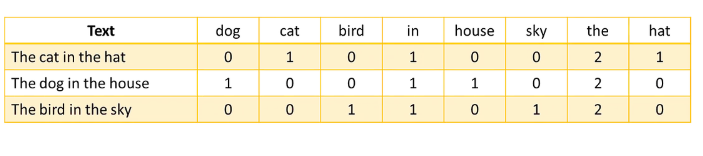

### n-grams

In [185]:
vectorizer = CountVectorizer(ngram_range=(2,2))

In [186]:
n_grams = vectorizer.fit_transform(sentences)

In [187]:
vectorizer.get_feature_names_out()

array(['bird in', 'cat in', 'dog in', 'in the', 'the bird', 'the cat',
       'the dog', 'the hat', 'the house', 'the sky'], dtype=object)

In [188]:
n_grams.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

In [189]:
bow_df = pd.DataFrame(n_grams.toarray(), columns= vectorizer.get_feature_names_out())

In [190]:
bow_df['text'] = sentences

In [191]:
bow_df

,bird in,cat in,dog in,in the,the bird,the cat,the dog,the hat,the house,the sky,text
0,0,1,0,1,0,1,0,1,0,0,The cat in the hat
1,0,0,1,1,0,0,1,0,1,0,The dog in the house
2,1,0,0,1,1,0,0,0,0,1,The bird in the sky


##### TF-IDF (Term Frequency-Inverse Document Frequency)
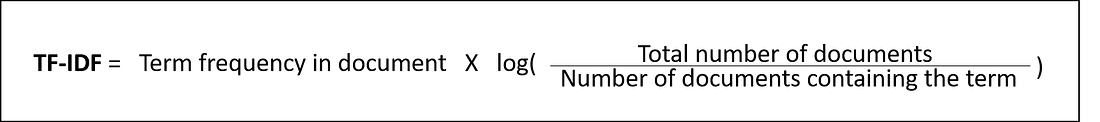

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [193]:
vectorizer = TfidfVectorizer()

In [194]:
tfidf = vectorizer.fit_transform(sentences)

In [195]:
vectorizer.get_feature_names_out()

array(['bird', 'cat', 'dog', 'hat', 'house', 'in', 'sky', 'the'],
      dtype=object)

In [196]:
tfidf.toarray()

array([[0.        , 0.51680194, 0.        , 0.51680194, 0.        ,
        0.30523155, 0.        , 0.61046311],
       [0.        , 0.        , 0.51680194, 0.        , 0.51680194,
        0.30523155, 0.        , 0.61046311],
       [0.51680194, 0.        , 0.        , 0.        , 0.        ,
        0.30523155, 0.51680194, 0.61046311]])

In [197]:
bow_df = pd.DataFrame(tfidf.toarray(), columns= vectorizer.get_feature_names_out())

In [198]:
bow_df['text'] = sentences

In [199]:
bow_df = bow_df[[bow_df.columns[-1]] + bow_df.columns[:-1].tolist()]

In [200]:
bow_df

,text,bird,cat,dog,hat,house,in,sky,the
0,The cat in the hat,0.000000,0.516802,0.000000,0.516802,0.000000,0.305232,0.000000,0.610463
1,The dog in the house,0.000000,0.000000,0.516802,0.000000,0.516802,0.305232,0.000000,0.610463
2,The bird in the sky,0.516802,0.000000,0.000000,0.000000,0.000000,0.305232,0.516802,0.610463
